In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deliveries = pd.read_csv(r"IPL datasets/deliveries.csv")
matches = pd.read_csv(r"IPL datasets/matches.csv")

In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
print("Shape of matches dataset :-",matches.shape)
print("Shape of delivers dataset :-",deliveries.shape)

Shape of matches dataset :- (756, 18)
Shape of delivers dataset :- (179078, 21)


<h3>We have a dataset is about total 756 matches information and in matches dataset we have teams and other information 

In [6]:
#fetch the total score of both inning of teams which are played
total_score_df = deliveries.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [7]:
total_score_df = total_score_df[total_score_df["inning"] == 1]

In [8]:
match_df = matches.merge(total_score_df[["match_id","total_runs"]],left_on = "id",right_on = "match_id")
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [9]:
match_df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
teams = [
    "Sunrisers Hyderabad",
    "Mumbai Indians",
    "Royal Challengers Bangalore",
    "Kolkata Knight Riders",
    "Kings XI Punjab",
    "Chennai Super Kings",
    "Rajasthan Royals",
    "Delhi Capitals"
]

In [11]:
match_df["team1"] = match_df["team1"].str.replace("Delhi Daredevils","Delhi Capitals")
match_df["team2"] = match_df["team2"].str.replace("Delhi Daredevils","Delhi Capitals")

match_df["team1"] = match_df["team1"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
match_df["team2"] = match_df["team2"].str.replace("Deccan Chargers","Sunrisers Hyderabad")

In [12]:
match_df = match_df[match_df["team1"].isin(teams)]
match_df = match_df[match_df["team2"].isin(teams)]

In [13]:
print(match_df["team1"].unique())
print(match_df["team2"].unique())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Capitals'
 'Mumbai Indians' 'Chennai Super Kings' 'Rajasthan Royals']
['Royal Challengers Bangalore' 'Delhi Capitals' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings']


In [14]:
#there 15 matches win are deal with dock_worth_lousi system because of rain , I dint consider dock worth system wins
match_df["dl_applied"].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [15]:
match_df = match_df[match_df["dl_applied"] == 0]
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [16]:
match_df["dl_applied"].value_counts()

0    626
Name: dl_applied, dtype: int64

In [17]:
final_match_df = match_df[["match_id","city","winner","total_runs"]]
final_match_df.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158


In [18]:
delivery_df = final_match_df.merge(deliveries,on = "match_id")
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [20]:
delivery_df.shape

(149578, 24)

In [21]:
delivery_df = delivery_df[delivery_df["inning"] == 2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [22]:
delivery_df.shape

(72413, 24)

In [23]:
delivery_df["current score"] = delivery_df.groupby("match_id").cumsum()["total_runs_y"]
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1


In [24]:
delivery_df["runs left"] = (delivery_df["total_runs_x"] + 1) - delivery_df["current score"]
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current score,runs left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207


In [25]:
delivery_df["balls left"]= 126 - (delivery_df["over"]*6 + delivery_df["ball"])
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current score,runs left,balls left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118


In [26]:
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].fillna("0")
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].apply(lambda x:x if x=="0" else "1")
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].astype("int")
wickets = delivery_df.groupby("match_id").cumsum()["player_dismissed"].values
delivery_df["wickets remaining"] = 10 - wickets
delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current score,runs left,balls left,wickets remaining
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [27]:
# crr = runs/overs
delivery_df["crr"]= (delivery_df["current score"]*6) / (120 - delivery_df["balls left"])
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current score,runs left,balls left,wickets remaining,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,207,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,118,10,3.0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,117,10,2.0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,205,116,10,4.5
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,201,115,10,8.4


In [28]:
delivery_df["rrr"] = (delivery_df["runs left"]*6)/ (delivery_df["balls left"])
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current score,runs left,balls left,wickets remaining,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


In [29]:
def result(row):
    return 1 if row["batting_team"] == row["winner"] else 0

In [30]:
delivery_df["result"]= delivery_df.apply(result,axis=1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current score,runs left,balls left,wickets remaining,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


In [31]:
delivery_df["result"].value_counts()

1    38062
0    34351
Name: result, dtype: int64

<AxesSubplot:>

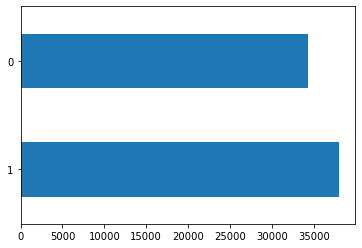

In [32]:
delivery_df["result"].value_counts().plot(kind="barh")

In [33]:
final_data = delivery_df[["batting_team","bowling_team","city","runs left","balls left","wickets remaining","total_runs_x","crr","rrr","result"]]

In [34]:
final_data.head()

,batting_team,bowling_team,city,runs left,balls left,wickets remaining,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,207,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,207,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,207,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,207,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,207,8.4,10.486957,0


In [35]:
final_data.tail(10)

,batting_team,bowling_team,city,runs left,balls left,wickets remaining,total_runs_x,crr,rrr,result
149568,Chennai Super Kings,Mumbai Indians,Hyderabad,13,9,5,152,7.567568,8.666667,0
149569,Chennai Super Kings,Mumbai Indians,Hyderabad,13,8,5,152,7.500000,9.750000,0
149570,Chennai Super Kings,Mumbai Indians,Hyderabad,11,7,5,152,7.539823,9.428571,0
149571,Chennai Super Kings,Mumbai Indians,Hyderabad,3,6,5,152,7.894737,3.000000,0
149572,Chennai Super Kings,Mumbai Indians,Hyderabad,2,5,5,152,7.878261,2.400000,0
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,5,152,7.862069,1.500000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,5,152,7.897436,-2.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,4,152,7.881356,-6.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,4,152,7.915966,-24.000000,0
149577,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,0,3,152,7.850000,-inf,0


In [36]:
#shuffle the data if same type data training leads in increase the bias
final_data=final_data.sample(final_data.shape[0])

In [37]:
final_data.sample()

,batting_team,bowling_team,city,runs left,balls left,wickets remaining,total_runs_x,crr,rrr,result
29154,Mumbai Indians,Kings XI Punjab,Centurion,4,23,8,119,7.175258,1.043478,1


In [38]:
final_data.shape

(72413, 10)

In [39]:
final_data.isnull().sum()

batting_team           0
bowling_team           0
city                 832
runs left              0
balls left             0
wickets remaining      0
total_runs_x           0
crr                    0
rrr                    5
result                 0
dtype: int64

In [40]:
final_data.dropna(inplace=True)

In [41]:
final_data.isnull().sum()

batting_team         0
bowling_team         0
city                 0
runs left            0
balls left           0
wickets remaining    0
total_runs_x         0
crr                  0
rrr                  0
result               0
dtype: int64

In [42]:
final_data.describe()

,runs left,balls left,wickets remaining,total_runs_x,crr,rrr,result
count,71576.000000,71576.000000,71576.000000,71576.000000,71576.000000,7.157600e+04,71576.000000
mean,93.383313,62.673159,7.537904,165.767841,7.449324,NaN,0.525246
std,50.058881,33.398497,2.139570,29.291819,2.277979,NaN,0.499366
min,-15.000000,-2.000000,0.000000,65.000000,0.000000,-inf,0.000000
25%,54.000000,35.000000,6.000000,147.000000,6.272727,7.272727e+00,0.000000
50%,93.000000,63.000000,8.000000,165.000000,7.500000,9.000000e+00,1.000000
75%,131.000000,92.000000,9.000000,185.000000,8.696629,1.106422e+01,1.000000
max,250.000000,119.000000,10.000000,250.000000,42.000000,inf,1.000000


In [43]:
final_data = final_data[final_data["balls left"] !=0]

In [44]:
final_data.describe()

,runs left,balls left,wickets remaining,total_runs_x,crr,rrr,result
count,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000
mean,93.621065,62.878725,7.553251,165.726963,7.447791,10.568474,0.526646
std,49.957572,33.259471,2.124334,29.294967,2.280498,14.041845,0.499293
min,-15.000000,-2.000000,0.000000,65.000000,0.000000,-516.000000,0.000000
25%,54.000000,35.000000,6.000000,147.000000,6.265782,7.267606,0.000000
50%,93.000000,64.000000,8.000000,165.000000,7.500000,9.000000,1.000000
75%,131.000000,92.000000,9.000000,185.000000,8.696385,11.032258,1.000000
max,250.000000,119.000000,10.000000,250.000000,42.000000,684.000000,1.000000


In [45]:
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [47]:
print("shape of training dataset :-",X_train.shape)
print("shape of testing dataset :-",X_test.shape)

shape of training dataset :- (57073, 9)
shape of testing dataset :- (14269, 9)


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [49]:
cl_transform = ColumnTransformer([
    ("cl_transform",OneHotEncoder(sparse=False,drop="first"),["batting_team","bowling_team","city"])
],remainder="passthrough")

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline

In [51]:
base_model_pipe = Pipeline([("transformer",cl_transform),("logistic",LogisticRegression(solver="liblinear"))])
base_model_pipe.fit(X_train,y_train)
base_model_pipe.score(X_test,y_test)

0.7997757376130072

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,base_model_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      6802
           1       0.80      0.82      0.81      7467

    accuracy                           0.80     14269
   macro avg       0.80      0.80      0.80     14269
weighted avg       0.80      0.80      0.80     14269



In [53]:
base_model_pipe.predict_proba(X_test)[0]

array([0.12250478, 0.87749522])

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
def model_predictor(model):
    pipilineForModel = Pipeline([("step1",cl_transform),("step2",model)])
    pipilineForModel.fit(X_train,y_train)
    score = pipilineForModel.score(X_test,y_test)
    return score

In [56]:
model_predictor(SVC())

0.7711822832714276

In [57]:
model_predictor(RandomForestClassifier())

0.9986684420772304

In [58]:
model_predictor(AdaBoostClassifier())

0.7999159016048777

In [59]:
final_model = Pipeline([("step1",cl_transform),("step2",LogisticRegression(solver="liblinear"))])
final_model.fit(X_train,y_train)
final_model.score(X_test,y_test)

0.7997757376130072

In [60]:
final_model.predict_proba(X_test)[2]

array([0.08613519, 0.91386481])

In [66]:
##save the model
import pickle
file = open("win_predictor.pkl","wb")

#dump the model
pickle.dump(final_model, file)

In [62]:
teams = final_data["batting_team"].unique()

In [63]:
cities = final_data["city"].unique()

In [64]:
teams

array(['Royal Challengers Bangalore', 'Mumbai Indians', 'Kings XI Punjab',
       'Deccan Chargers', 'Rajasthan Royals', 'Delhi Daredevils',
       'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Kolkata Knight Riders', 'Delhi Capitals'], dtype=object)

In [65]:
cities

array(['Chennai', 'Port Elizabeth', 'Nagpur', 'Jaipur', 'Hyderabad',
       'Ahmedabad', 'Mumbai', 'Chandigarh', 'Durban', 'Delhi', 'Kolkata',
       'Bangalore', 'Pune', 'Mohali', 'Sharjah', 'Centurion', 'Bengaluru',
       'Abu Dhabi', 'Dharamsala', 'Ranchi', 'East London', 'Indore',
       'Raipur', 'Johannesburg', 'Visakhapatnam', 'Cuttack', 'Kimberley',
       'Bloemfontein', 'Cape Town'], dtype=object)